## Objective
* __Create your own dataset that contains a random sample of reviews__

## Workflow

1. Read the video game review data. Take a look at the text of the reviews and the ratings, which you will work with in this milestone.Note that your data is not pure JSON, but new line delimited JSON. To be able to read it, install and import  <span style="color:red">ndjson</span>.
2. Create a plot of the ratings of the product. Study the distribution of the five categories.
3. Take a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller __balanced__ corpus, on which you will during Milestones 2-4. 
4. Take a random sample of the reviews by selecting 100,000 reviews. This way you get a bigger representative corpus, on which you will work in Milestones 4 and 5.
    * If you want to get identical results that are provided as a sample solution, use 42 as a random state.
5. Export your corpora to two separate .csv files. Both of your tables should contain a column for the reviews and a column for the ratings. From now on we call the review text of the JSON key “reviews” and the overall key “ratings.” Name your corpora small_corpus and big_corpus.


In [1]:
import ndjson
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# reading reviews from json file
with open('../data/Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
reviews_df = pd.DataFrame(data)

In [4]:
reviews_df[reviews_df['reviewText'].isna()]

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
10511,5.0,True,"12 26, 2015",A1G2R5DGP0545K,B000031KJM,NickStRRR,NaN,Five Stars,1451088000,NaN,NaN,NaN
10923,5.0,True,"02 20, 2016",AIZ3LDIWZGZ2S,B000035XR9,Josie smith,NaN,Five Stars,1455926400,NaN,NaN,NaN
11713,5.0,True,"02 20, 2016",AIZ3LDIWZGZ2S,B000035Y6B,Josie smith,NaN,Five Stars,1455926400,NaN,"{'Size:': ' 1 Pack', 'Color:': ' Black'}",NaN
15785,5.0,True,"11 7, 2015",A28GUSLMZNR8MV,B00004TC6E,Abby Street,NaN,Five Stars,1446854400,NaN,NaN,NaN
35564,5.0,False,"04 27, 2017",A1LZ5L7E7V4AW9,B0000696CZ,Amazon Customer,NaN,Five Stars,1493251200,NaN,{'Format:': ' Video Game'},NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
481196,5.0,True,"05 26, 2016",AMTA0FXWR067H,B004L9WGDA,Rod Rojas,NaN,Five Stars,1464220800,NaN,{'Platform:': ' Xbox 360'},NaN
487490,5.0,False,"04 22, 2017",A1LZ5L7E7V4AW9,B00CD90R4K,Amazon Customer,NaN,Five Stars,1492819200,NaN,{'Format:': ' Video Game'},NaN
490055,5.0,False,"09 22, 2017",A3VQ8SIEGCYEAO,B00HQCSHGY,Amazon Customer,NaN,Five Stars,1506038400,NaN,NaN,NaN
490187,5.0,True,"06 10, 2018",A2P6KGP7U2D2NX,B00I19TXQE,abraham,NaN,Five Stars,1528588800,NaN,{'Format:': ' Video Game'},NaN


In [5]:
reviews_df.dropna(subset=['reviewText'], inplace=True)

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497419 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497419 non-null  float64
 1   verified        497419 non-null  bool   
 2   reviewTime      497419 non-null  object 
 3   reviewerID      497419 non-null  object 
 4   asin            497419 non-null  object 
 5   reviewerName    497343 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497316 non-null  object 
 8   unixReviewTime  497419 non-null  int64  
 9   vote            107784 non-null  object 
 10  style           289123 non-null  object 
 11  image           3600 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 46.0+ MB


### Data Dictionry
   * __reviewerID__ - ID of the reviewer, e.g. A2SUAM1J3GNN3B
   * __asin__ - ID of the product, e.g. 0000013714
   * **reviewerName** - name of the reviewer
   * **vote** - helpful votes of the review
   * **style** - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
   * **reviewText** - text of the review
   * **overall** - rating of the product
   * **summary** - summary of the review
   * **unixReviewTime** - time of the review (unix time)
   * **reviewTime** - time of the review (raw)
   * **image** - images that users post after they have received the product


In [7]:
reviews_df.shape

(497419, 12)

In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497419 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497419 non-null  float64
 1   verified        497419 non-null  bool   
 2   reviewTime      497419 non-null  object 
 3   reviewerID      497419 non-null  object 
 4   asin            497419 non-null  object 
 5   reviewerName    497343 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497316 non-null  object 
 8   unixReviewTime  497419 non-null  int64  
 9   vote            107784 non-null  object 
 10  style           289123 non-null  object 
 11  image           3600 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 46.0+ MB


<AxesSubplot:xlabel='overall', ylabel='count'>

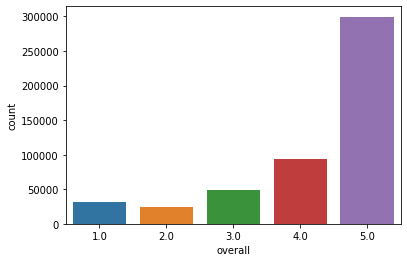

In [9]:
sns.countplot(data = reviews_df, x='overall')

In [10]:
reviews_df['asin'].value_counts(dropna=False)

B00178630A    1381
B000ZK9QCS     905
B000XJNTNS     834
B00JK00S0S     783
B000ZKA0J6     774
              ... 
B000WMJM3W       1
B000XJD33E       1
B000YI5BZC       1
B0017WKITS       1
B000W2UJ2A       1
Name: asin, Length: 17408, dtype: int64

In [11]:
reviews_df['overall'].value_counts(dropna=False)

5.0    299623
4.0     93644
3.0     49140
1.0     30879
2.0     24133
Name: overall, dtype: int64

### Undersampling of Reviews
Taking a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.


In [12]:
one_1500 = reviews_df[reviews_df['overall']==1.0].sample(n=1500)
two_500 = reviews_df[reviews_df['overall']==2.0].sample(n=500)
three_500 = reviews_df[reviews_df['overall']==3.0].sample(n=500)
four_500 = reviews_df[reviews_df['overall']==4.0].sample(n=500)
five_1500 = reviews_df[reviews_df['overall']==5.0].sample(n=1500)

In [13]:
undersampled_reviews = pd.concat([one_1500, two_500, three_500, four_500, five_1500], axis=0)

In [14]:
undersampled_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
259329,1.0,True,"06 3, 2015",A392ZB0EJB75NE,B005WWZUQ0,THE 300LB GORILLA,CRAPPY GAME! COD IS FAR BETTER!!!,JUNK!!! CALL OF DUTY IS WAY BETTER,1433289600,NaN,"{'Edition:': ' Standard', 'Platform:': ' PC'}",NaN
490504,1.0,False,"12 24, 2016",A5I88702K12HM,B00IUGYTOO,Carmilla,First it charged very slowly and now it won't ...,First it charged very slowly and now it won't ...,1482537600,NaN,NaN,NaN
420264,1.0,True,"07 2, 2016",A3OV9EN3IXVBIK,B014US02ZA,Amazon Customer,it doesnt work i have to turn the wheel 1080 d...,Doesnt work...,1467417600,NaN,{'Edition:': ' Basic'},NaN
478439,1.0,True,"03 14, 2015",A1ATHDILELXROF,B002PDPMMQ,Renee L Williams,I didn't care for this version of Luxor. I ha...,I didn't like graphics.,1426291200,NaN,NaN,NaN
440564,1.0,True,"04 26, 2017",A122TWEM8AXIQN,B01GHPLYMO,chancy319,It stopped working after six months. The audio...,Trash,1493164800,NaN,NaN,NaN


In [15]:
undersampled_reviews['overall'].value_counts(dropna=False)

5.0    1500
1.0    1500
4.0     500
2.0     500
3.0     500
Name: overall, dtype: int64

<AxesSubplot:xlabel='overall', ylabel='count'>

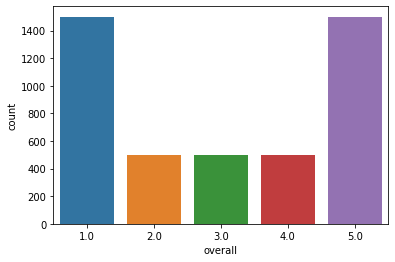

In [16]:
sns.countplot(data=undersampled_reviews, x='overall')

### Random Sampling of 100K Reviews

In [17]:
sample_100K_revs = reviews_df.sample(n=100000, random_state=42)

### Writing Corpora

In [18]:
undersampled_reviews.to_csv("../data/sample_corpus.csv", index=False)

In [19]:
sample_100K_revs.to_csv("../data/big_corpus.csv", index=False)